In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
#Reading Data
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=False)

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')


In [3]:
print(loan_data.shape)
print(test_data.shape)

(491, 14)
(123, 12)


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [5]:
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [6]:
loan_data.describe(include='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,491,481,490,482,491,462,491
unique,491,2,2,4,2,2,3
top,LP002305,Male,Yes,0,Graduate,No,Semiurban
freq,1,393,324,276,388,398,186


**DATA PREPROCESSING**

In [7]:
#Check null value
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_data['Loan_Status'].value_counts()[0:]

1    343
0    148
Name: Loan_Status, dtype: int64

In [9]:
#Fill Null Value
#Categorical column

loan_data['Gender']=loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married']=loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents']=loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed']=loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [10]:
#Fill Null Value
#Numerical column

loan_data['LoanAmount']=loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Loan_Amount_Term']=loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())
loan_data['Credit_History']=loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())

#You can check weather null values are replace or not

Text(0.5, 1.0, 'LoanAmount')

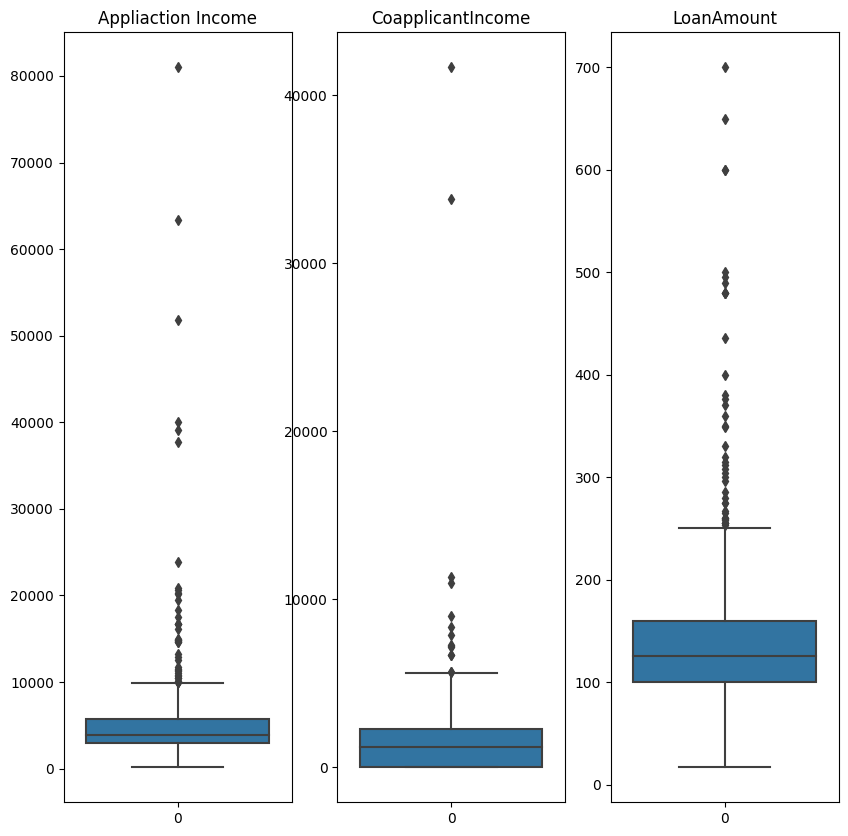

In [11]:
#Outliers From Dataset
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
sns.boxplot(loan_data['ApplicantIncome'])
plt.title('Appliaction Income')



plt.subplot(1,3,2)
sns.boxplot(loan_data['CoapplicantIncome'])
plt.title('CoapplicantIncome')


plt.subplot(1,3,3)
sns.boxplot(loan_data['LoanAmount'])
plt.title('LoanAmount')

You can see all three numerical column contain outlier so if we want to create unbiased model who will give more accurate output we have to handle them


IQR = (Q3-Q1)

lL = Q1-1.5IQR

UL = Q3 + 1.5iqr

In [12]:
#We will not use IQR we will remove outlier by visualization 
#Remove outlier from data based on Applicant Income 
print(f"Data shape with Outlier",{loan_data.shape})
loan_data=loan_data[loan_data['ApplicantIncome']<25000]
print(f"Data shape without Outlier",{loan_data.shape})


Data shape with Outlier {(491, 14)}
Data shape without Outlier {(485, 14)}


In [13]:
#Remove outlier from data based on CoapplicantIncome
print(f"Data shape with Outlier",{loan_data.shape})
loan_data=loan_data[loan_data['LoanAmount']<400]
print(f"Data shape without Outlier",{loan_data.shape})


Data shape with Outlier {(485, 14)}
Data shape without Outlier {(476, 14)}


In [14]:
#Remove outlier from data based on LoanAmount
print(f"Data shape with Outlier",{loan_data.shape})
loan_data=loan_data[(loan_data['CoapplicantIncome']<12000) & (loan_data['CoapplicantIncome']>=0)]
print(f"Data shape without Outlier",{loan_data.shape})

Data shape with Outlier {(476, 14)}
Data shape without Outlier {(474, 14)}


Text(0.5, 1.0, 'Distribution for LoanAmount')

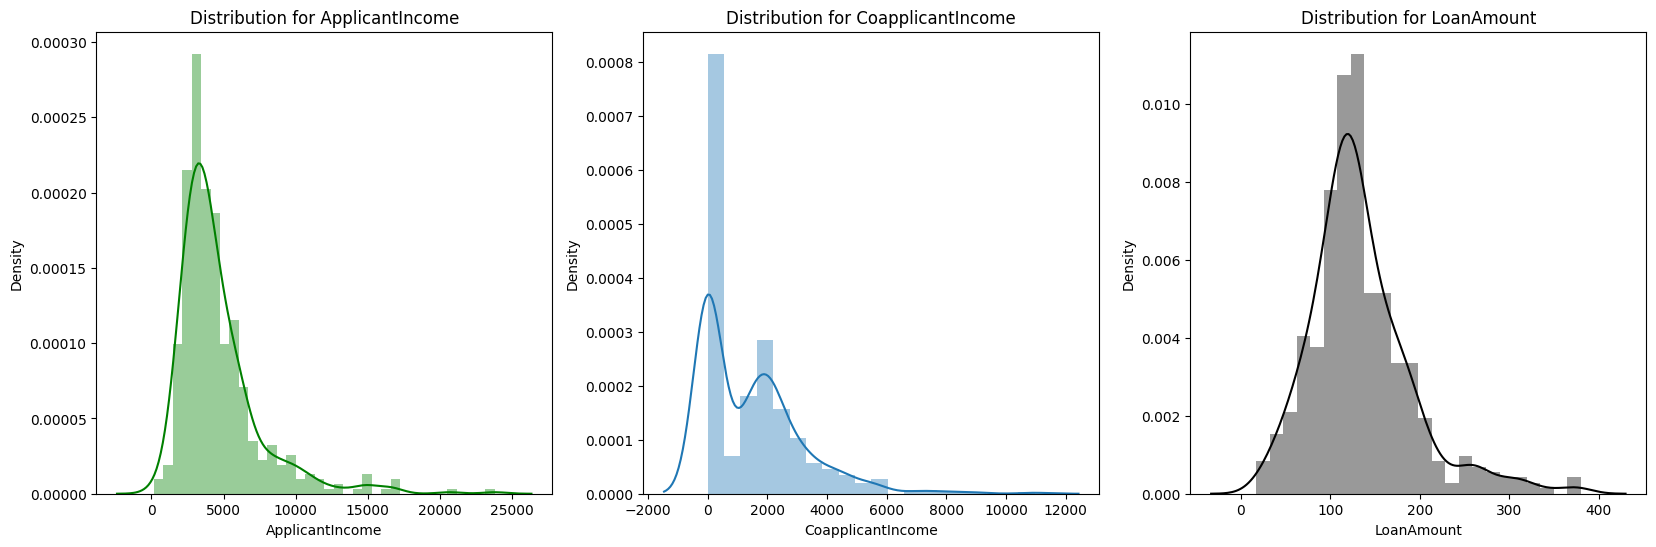

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(loan_data['ApplicantIncome'],color='green')
plt.title("Distribution for ApplicantIncome")

plt.subplot(1,3,2)
sns.distplot(loan_data['CoapplicantIncome'])
plt.title("Distribution for CoapplicantIncome")

plt.subplot(1,3,3)
sns.distplot(loan_data['LoanAmount'],color='black')
plt.title("Distribution for LoanAmount")#Check weather data distributed Normally or Not after removing outlier


Text(0.5, 1.0, 'Distribution for LoanAmount')

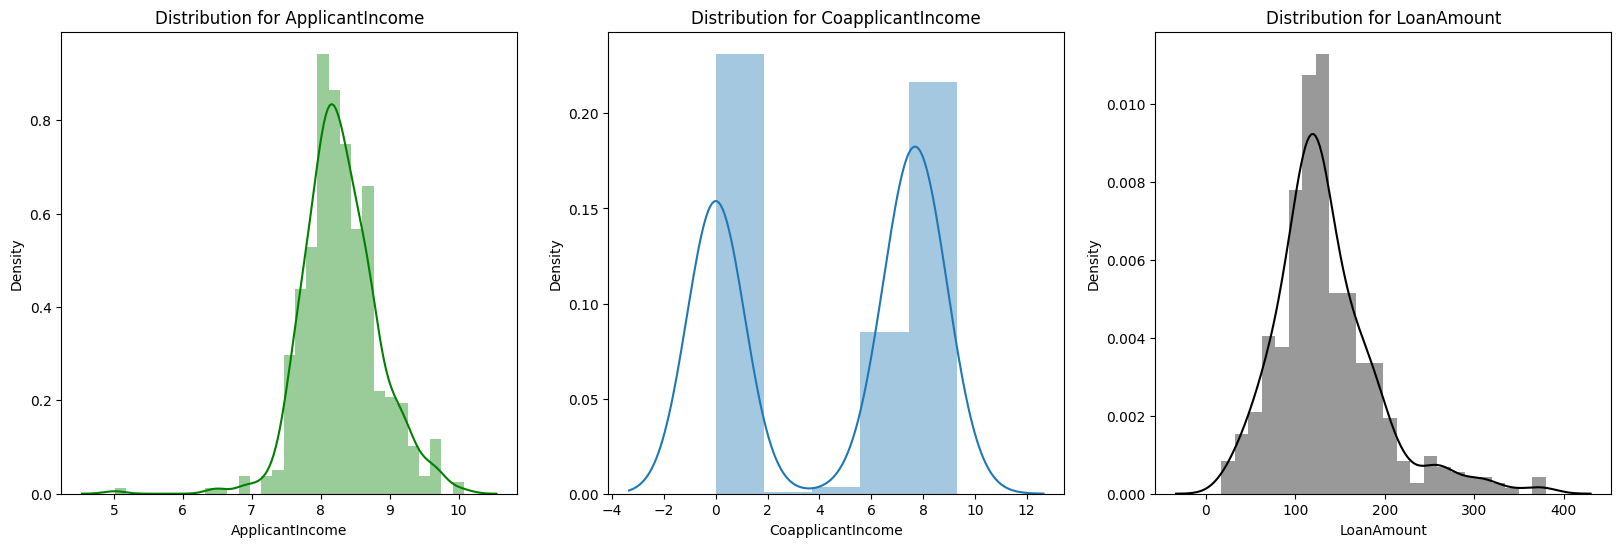

In [16]:
#You can see First Third graph data is normally distributed but first two graph are need to correct
loan_data['ApplicantIncome'] = np.log(loan_data['ApplicantIncome'])
loan_data['CoapplicantIncome'] = np.log1p(loan_data['CoapplicantIncome'])

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(loan_data['ApplicantIncome'],color='green')
plt.title("Distribution for ApplicantIncome")

plt.subplot(1,3,2)
sns.distplot(loan_data['CoapplicantIncome'])
plt.title("Distribution for CoapplicantIncome")

plt.subplot(1,3,3)
sns.distplot(loan_data['LoanAmount'],color='black')
plt.title("Distribution for LoanAmount")

**EDA**

In [17]:
#Select Numerical and categoricak data
num_column=loan_data.select_dtypes(exclude='object').columns.to_list()
cat_column=loan_data.select_dtypes(include='object').columns.to_list()
cat_column

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

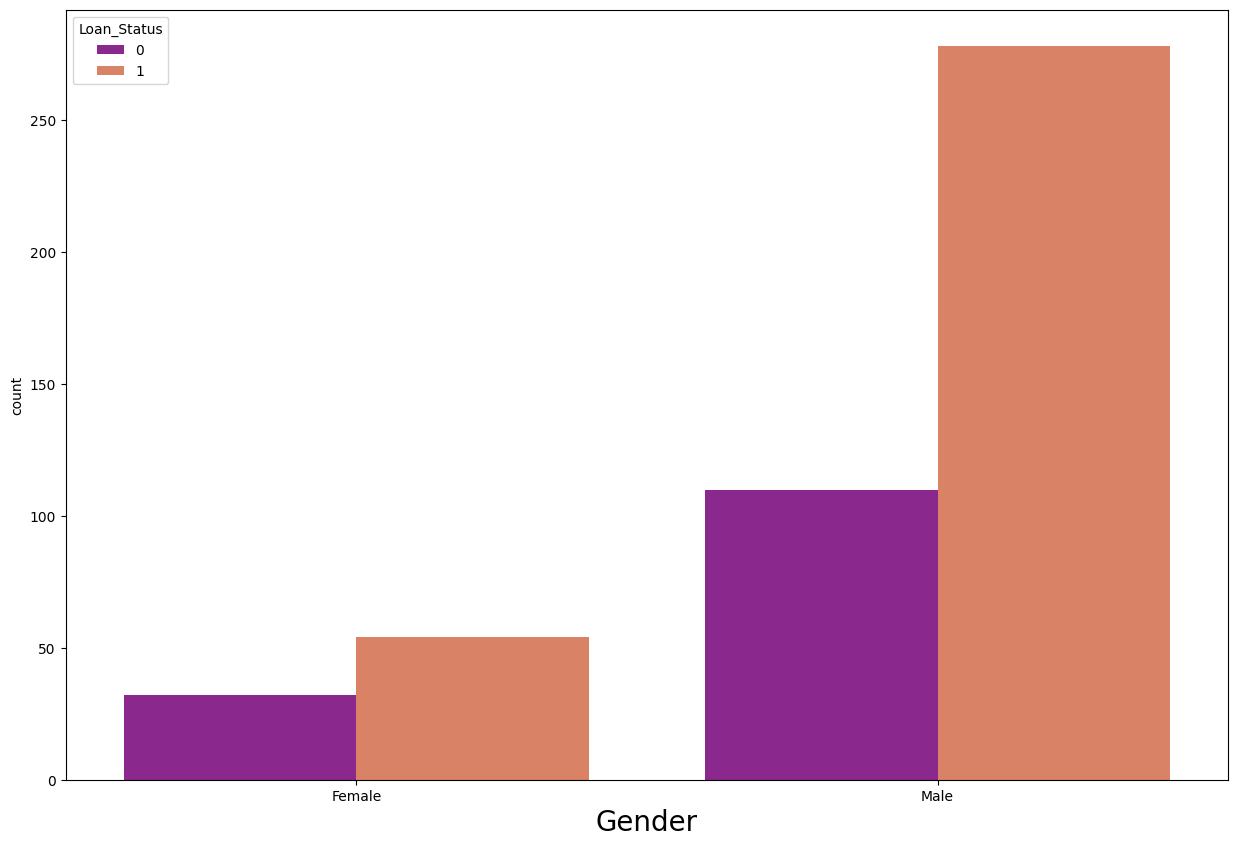

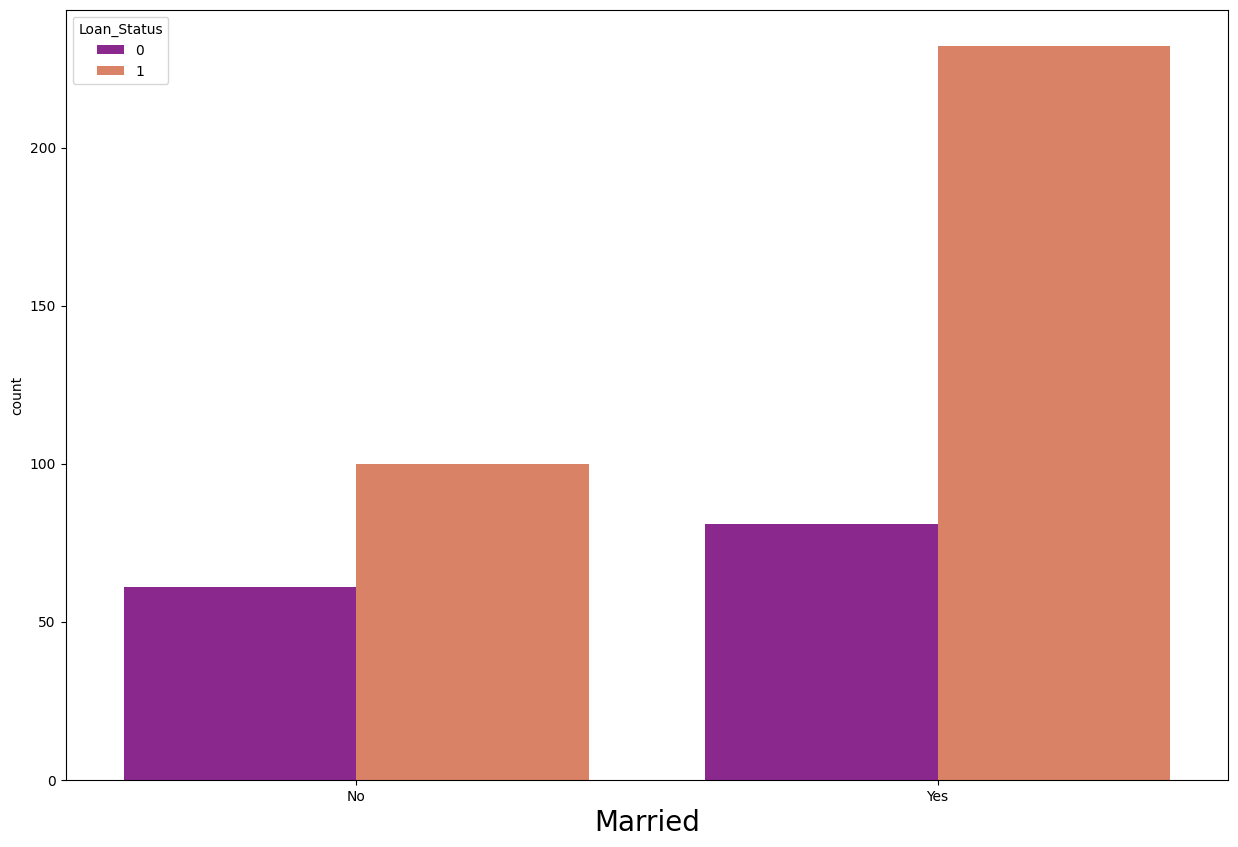

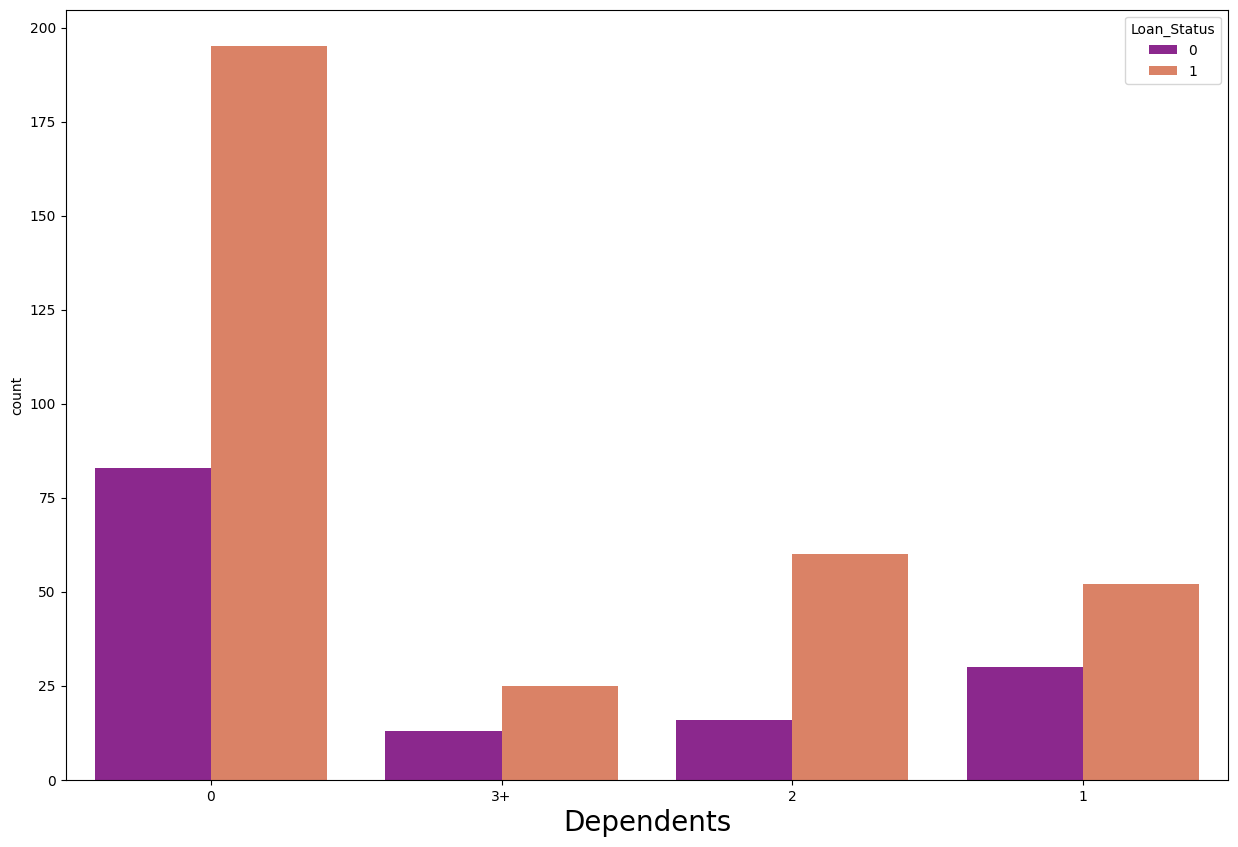

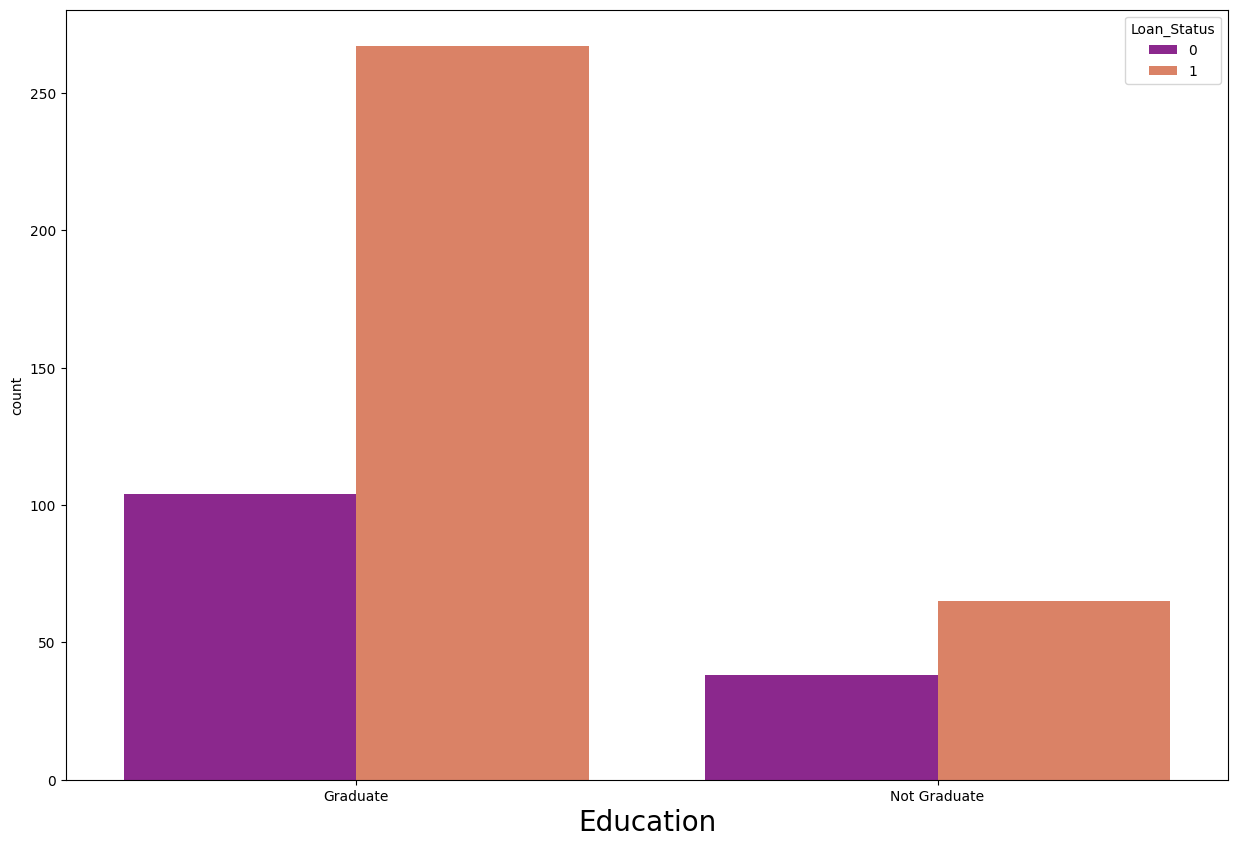

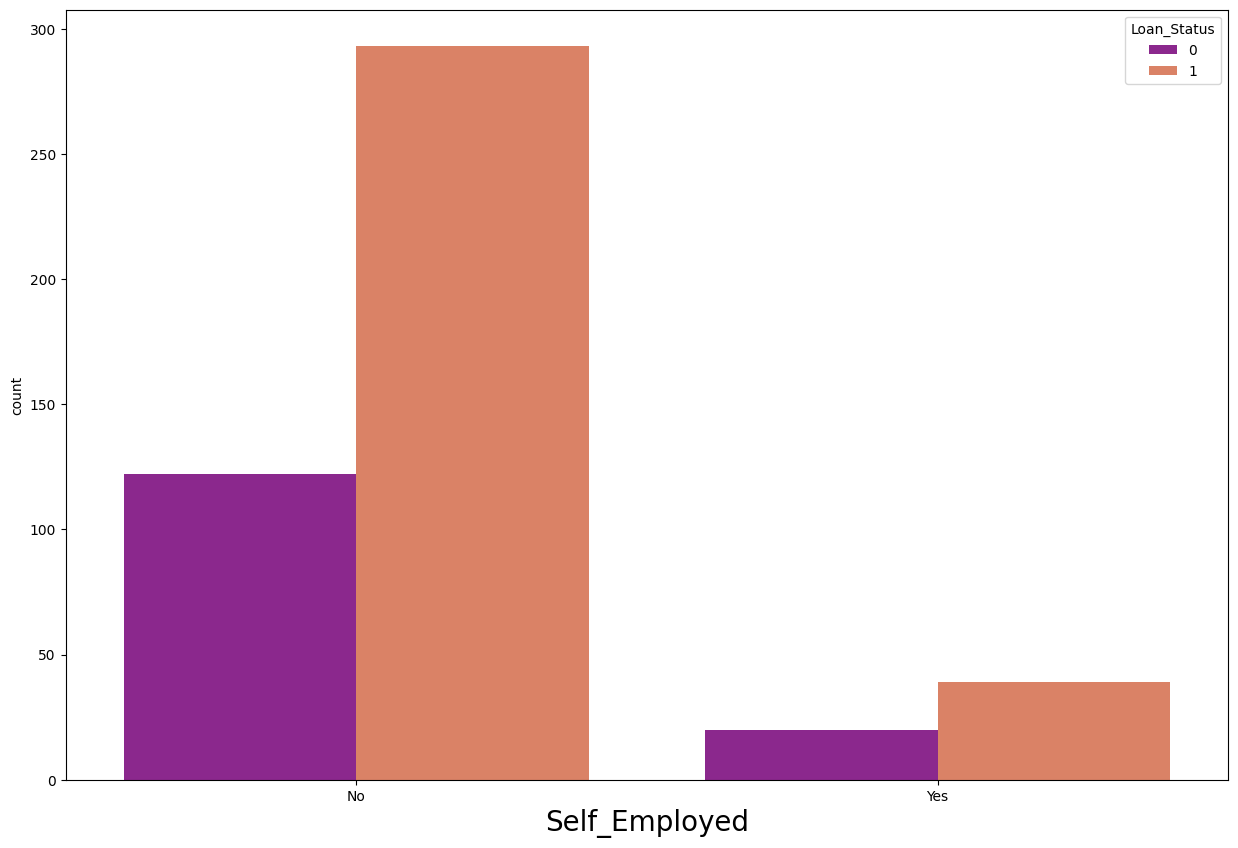

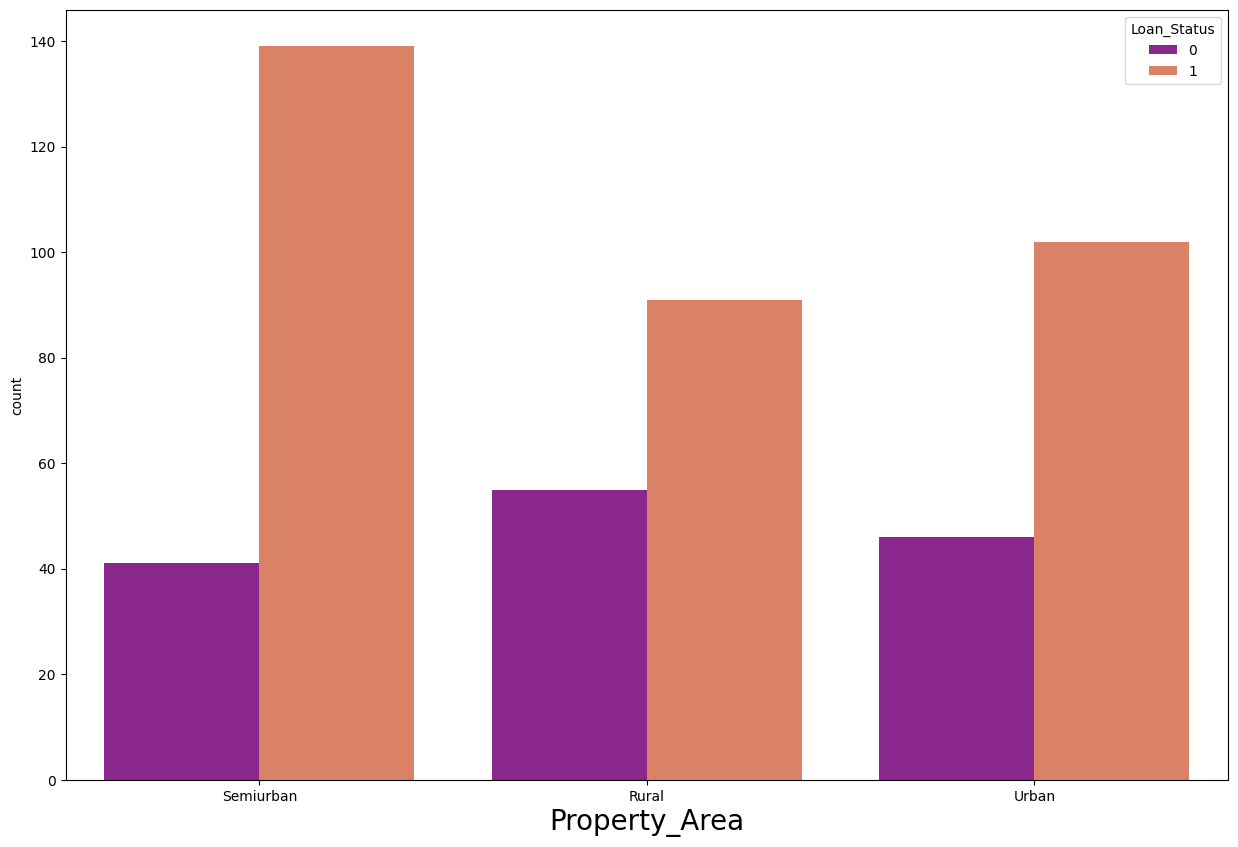

In [18]:
#Check Balance In Categorical Column

for i in cat_column[1:]:
    plt.figure(figsize = (15,10))
    plt.subplot(1,1,1)
    sns.countplot(data=loan_data , x=i , hue = 'Loan_Status',palette='plasma')
    plt.xlabel(i,fontsize=20)
    


In [19]:
loan_data.columns


Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
#Categorical Data with Target Data
abc=loan_data.groupby(by='Loan_Status')
abc.first()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,,
0,2,LP002086,Female,Yes,0,Graduate,No,8.374015,7.804659,110.0,360.0,1.0,Urban
1,0,LP002305,Female,No,0,Graduate,No,8.422223,0.000000,115.0,360.0,1.0,Semiurban


In [21]:

loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,8.422223,0.000000,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,8.648748,0.000000,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,8.374015,7.804659,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,8.454253,0.000000,96.0,360.0,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,8.809863,7.467942,230.0,300.0,1.0,Semiurban,1


In [22]:
loan_data.groupby(by=['Loan_Status','Married']).count().iloc[:,1].T

Loan_Status  Married
0            No          61
             Yes         81
1            No         100
             Yes        232
Name: Loan_ID, dtype: int64

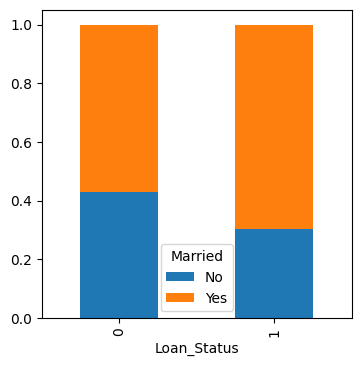

In [23]:

married=pd.crosstab(loan_data['Loan_Status'],loan_data['Married'])
married.div(married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [24]:
pd.crosstab(loan_data['Loan_Status'],loan_data['Property_Area'])

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
0,55,41,46
1,91,139,102


In [25]:
pd.crosstab(loan_data['Loan_Status'],loan_data['Education'])

Education,Graduate,Not Graduate
Loan_Status,,
0,104,38
1,267,65


In [26]:
pd.crosstab(loan_data['Loan_Status'],loan_data['Self_Employed'])

Self_Employed,No,Yes
Loan_Status,,
0,122,20
1,293,39


In [27]:
#Data Prepration

loan_data.select_dtypes(include='object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP002305,Female,No,0,Graduate,No,Semiurban
1,LP001715,Male,Yes,3+,Not Graduate,Yes,Rural
2,LP002086,Female,Yes,0,Graduate,No,Urban
3,LP001136,Male,Yes,0,Not Graduate,Yes,Urban
4,LP002529,Male,Yes,2,Graduate,No,Semiurban


In [28]:
loan_data=loan_data.drop(columns=['Loan_ID'])
loan_data=loan_data.drop(columns=['Unnamed: 0'])

In [29]:
loan_data.select_dtypes(include='object').head()
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
loan_data['Gender']=loan_data['Gender'].replace(('Male','Female'),(1,0))
loan_data['Married']=loan_data['Married'].replace(('Yes','No'),(1,0))
loan_data['Education']=loan_data['Education'].replace(('Graduate','Not Graduate'),(1,0))
loan_data['Self_Employed']=loan_data['Self_Employed'].replace(('Yes','No'),(1,0))
loan_data['Property_Area']=loan_data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,2))
loan_data['Dependents']=loan_data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

In [31]:
y=loan_data[['Loan_Status']]
x=loan_data.drop(columns=['Loan_Status'])

In [32]:
print(x.shape)
print(y.shape)

(474, 11)
(474, 1)


**Handel Imbalnce Data**

In [33]:

from imblearn.over_sampling import SMOTE

In [34]:
x_bsample , ybsample = SMOTE().fit_resample(x,y.values.ravel())

In [35]:
print(x_bsample.shape)
print(ybsample.shape)

(664, 11)
(664,)


In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x_bsample , ybsample , test_size=0.2 , random_state=121)

In [37]:
print(x_train.shape)
print(y_train.shape)

(531, 11)
(531,)


**Model Building**


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = LR.predict(x_test)


In [41]:
from sklearn.metrics import accuracy_score 


In [42]:
print("Data Accuracy")
print(" Accuracy of Train Data = " , LR.score(x_train , y_train))
print(" Accuracy of Test Data = " , LR.score(x_test , y_test))

Data Accuracy
 Accuracy of Train Data =  0.7909604519774012
 Accuracy of Test Data =  0.8045112781954887


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        66
           1       0.76      0.90      0.82        67

    accuracy                           0.80       133
   macro avg       0.81      0.80      0.80       133
weighted avg       0.81      0.80      0.80       133



In [45]:
print("Data Accuracy")
print('Model accuracy' , accuracy_score(y_test,y_pred))

Data Accuracy
Model accuracy 0.8045112781954887


## Logistic Regression using stratified k-folds cross validation
    We use cross validation technique to test on unseen data. Here we reserve some part of data which you havenot used while training or testing .Some common technique are 
* The validation set approach
* k-fold cross validation
* Leave one out cross validation
* statified k-fold cross validation


### We will use Statified k-fold cross validation technique
* Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
* For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
* It is generally a better approach when dealing with both bias and variance.
* A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.



In [46]:
from sklearn.model_selection import StratifiedGroupKFold

In [47]:
#For 5 fold

i = 1
mean = 0
fmean = 0
kf=StratifiedGroupKFold(n_splits=5 , random_state = 1)
for train_index , test_index in kf.split()

SyntaxError: expected ':' (2631067493.py, line 7)

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])

In [ ]:
kf=StratifiedGroupKFold(n_splits=2)
for train ,test in kf.split(X,y):
    print(train)
    print(test)

[1 2 3]
[0]
[0 1 2 3]
[]
